In [10]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from deck import Deck
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def check_table(t):
    convenient_list = [ele.value for ele in t]
    i = convenient_list.index(convenient_list[-1])
    if i != len(convenient_list)-1:
        return i

In [37]:
def run(num_pair=1, ratio=0.5):
    deck = Deck(num_pair=num_pair)
    n_1 = int(round(ratio * num_pair * 52))
    deck.shuffle()
    counter = 0
    hand1 = []
    hand2 = []
    table = []
    for i in range(n_1):
        hand1.append(deck.deal())

    while len(deck.deck) != 0:
        hand2.append(deck.deal())
    while True:
        for h in [hand1, hand2]:
            counter += 1
            table.append(h.pop(0))
            index = check_table(table)
            if index or index == 0:
                h.extend(table[index:])
                table = table[0:index]
        if len(hand1) * len(hand2) == 0:
            return counter

In [54]:
ls = []
ave_list = []
s = 0
for i in range(10000):
    print(i+1, end='\r')
    result = run(ratio=0.95)
    ls.append(result)
    s += result
    ave_list.append(s/(i+1))
df = pd.DataFrame({"result":ls, "average":ave_list})

In [55]:
df["result"].describe()

count    10000.000000
mean        42.869400
std        147.437412
min          6.000000
25%          6.000000
50%          6.000000
75%         20.000000
max       2552.000000
Name: result, dtype: float64

<AxesSubplot: >

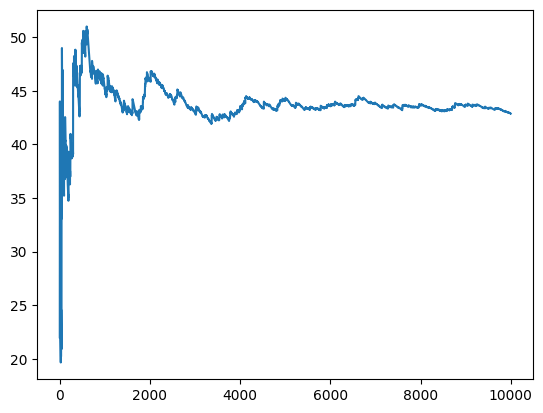

In [56]:
df["average"].plot()